In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date
from nsepy import get_history as gh

In [53]:
stocksymbols = ['NIFTYBEES','BANKBEES','GOLDBEES','RELIANCE','ITC','COALINDIA','VEDL']
startdate = date(2018,10,14)
end_date = date(2021,11,22)
print(end_date)
print(f"You have {len(stocksymbols)} stocks in you protfolio")

2021-11-22
You have 7 stocks in you protfolio


# Fetching Data

In [112]:
nif = pd.read_csv('NIFTY_DATA.csv')
nif.head(5)

,date,open,high,low,close
0,2021-11-22,17796.25,17805.25,17280.45,17416.55
1,2021-11-18,17890.55,17945.60,17688.50,17764.80
2,2021-11-17,17939.35,18022.65,17879.25,17898.65
3,2021-11-16,18127.05,18132.65,17958.80,17999.20
4,2021-11-15,18140.95,18210.15,18071.30,18109.45


In [113]:
nif = nif[['date','close']]
nif.columns = ['Date','NIFTY']
nif.tail(4)

,Date,NIFTY
5680,1999-02-01,940.15
5681,1999-01-29,966.20
5682,1999-01-28,955.10
5683,1999-01-27,971.30


In [114]:
nif[nif['Date'] == '2018-10-15']

,Date,NIFTY
767,2018-10-15,10512.5


In [115]:
nif = nif[:768]
nif = nif[::-1]
nif.head(5)


,Date,NIFTY
767,2018-10-15,10512.50
766,2018-10-16,10584.75
765,2018-10-17,10453.05
764,2018-10-19,10303.55
763,2018-10-22,10245.25


In [116]:
nif.reset_index(drop=True,inplace=True)
nif.head(5)

,Date,NIFTY
0,2018-10-15,10512.50
1,2018-10-16,10584.75
2,2018-10-17,10453.05
3,2018-10-19,10303.55
4,2018-10-22,10245.25


In [117]:
nif.set_index('Date',drop=True,inplace=True)
nif.head(5)

,NIFTY
Date,
2018-10-15,10512.50
2018-10-16,10584.75
2018-10-17,10453.05
2018-10-19,10303.55
2018-10-22,10245.25


In [67]:

df = pd.DataFrame()
for i in range(len(stocksymbols)):
    data = gh(symbol = stocksymbols[i],start = startdate,end = (end_date))[['Symbol','Close']]
    data.rename(columns = {'Close':data['Symbol'][0]},inplace=True)
    data.drop(['Symbol'],axis=1,inplace=True)
    if i == 0:
        df = data
    else:
        df = df.join(data)
df

,NIFTYBEES,BANKBEES,GOLDBEES,RELIANCE,ITC,COALINDIA,VEDL
Date,,,,,,,
2018-10-15,1099.85,2587.09,2850.15,1139.75,282.50,275.65,210.60
2018-10-16,1106.16,2612.83,2829.45,1163.80,282.65,276.40,212.45
2018-10-17,1093.20,2564.82,2835.20,1151.30,286.45,279.90,207.95
2018-10-19,1074.43,2557.37,2856.55,1101.30,289.45,275.15,211.10
2018-10-22,1071.50,2551.50,2835.80,1062.65,288.50,275.50,213.55
...,...,...,...,...,...,...,...
2021-11-15,195.52,389.79,42.65,2577.80,238.10,159.75,324.55
2021-11-16,194.47,385.59,42.80,2517.90,235.45,159.05,332.75
2021-11-17,193.53,383.83,42.54,2464.00,239.50,156.10,338.20


In [119]:
df['Nifty'] = nif['NIFTY']

In [120]:
df.head(5)

,NIFTYBEES,BANKBEES,GOLDBEES,RELIANCE,ITC,COALINDIA,VEDL,Nifty
Date,,,,,,,,
2018-10-15,1099.85,2587.09,2850.15,1139.75,282.50,275.65,210.60,NaN
2018-10-16,1106.16,2612.83,2829.45,1163.80,282.65,276.40,212.45,NaN
2018-10-17,1093.20,2564.82,2835.20,1151.30,286.45,279.90,207.95,NaN
2018-10-19,1074.43,2557.37,2856.55,1101.30,289.45,275.15,211.10,NaN
2018-10-22,1071.50,2551.50,2835.80,1062.65,288.50,275.50,213.55,NaN


# Analysis

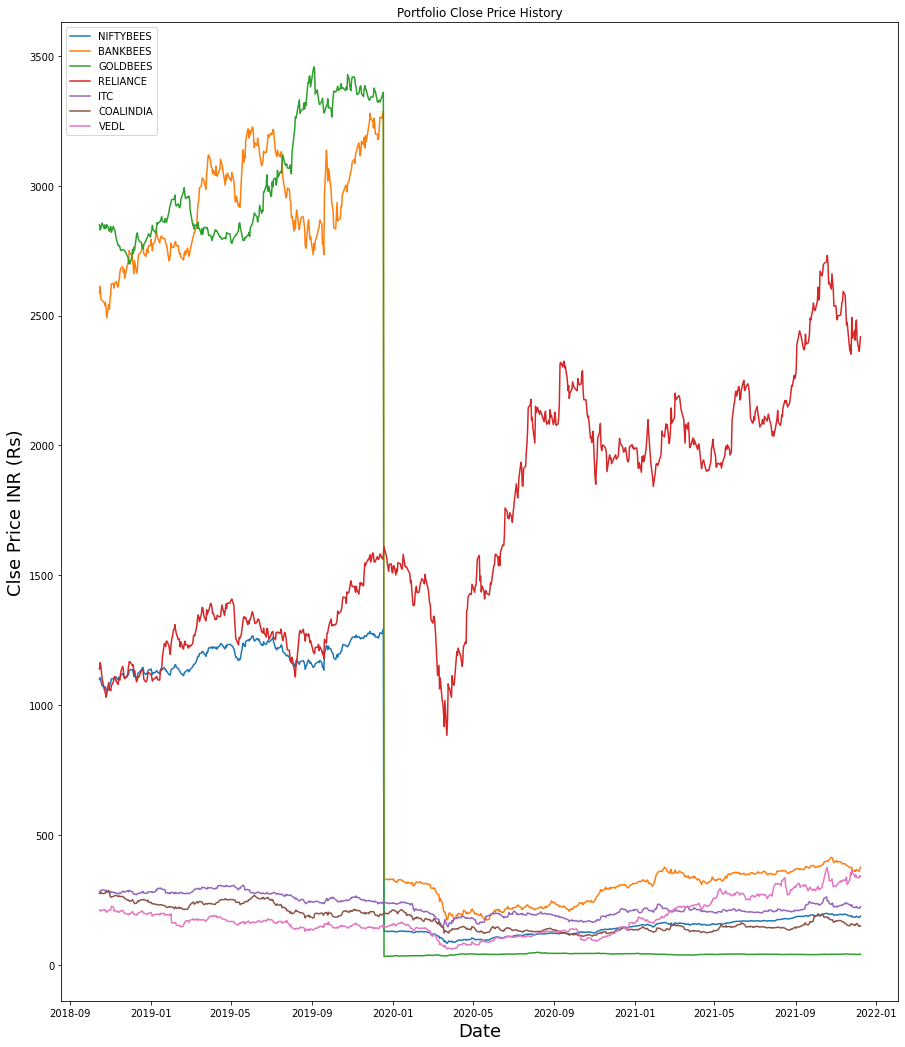

In [26]:
#plotiing the close price history

fig,ax = plt.subplots(figsize=(15,18))
for i in df.columns.values:
    ax.plot(df[i],label = i)
ax.set_title('Portfolio Close Price History')
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Clse Price INR (Rs)', fontsize=18)
ax.legend(df.columns.values,loc = 'upper left')
plt.show(fig)

Correlation Matrix

In [27]:
correlation_matrix = df.corr(method= 'pearson')
correlation_matrix

,NIFTYBEES,BANKBEES,GOLDBEES,RELIANCE,ITC,COALINDIA,VEDL
NIFTYBEES,1.000000,0.999400,0.994507,-0.683980,0.856786,0.856336,-0.076372
BANKBEES,0.999400,1.000000,0.992965,-0.689105,0.855494,0.856732,-0.087089
GOLDBEES,0.994507,0.992965,1.000000,-0.708420,0.819032,0.827819,-0.127728
RELIANCE,-0.683980,-0.689105,-0.708420,1.000000,-0.511266,-0.662914,0.516990
ITC,0.856786,0.855494,0.819032,-0.511266,1.000000,0.926454,0.221084
COALINDIA,0.856336,0.856732,0.827819,-0.662914,0.926454,1.000000,0.077608
VEDL,-0.076372,-0.087089,-0.127728,0.516990,0.221084,0.077608,1.000000


Plotting the correlation Matrix

Correlation between Stocks in you portfolio


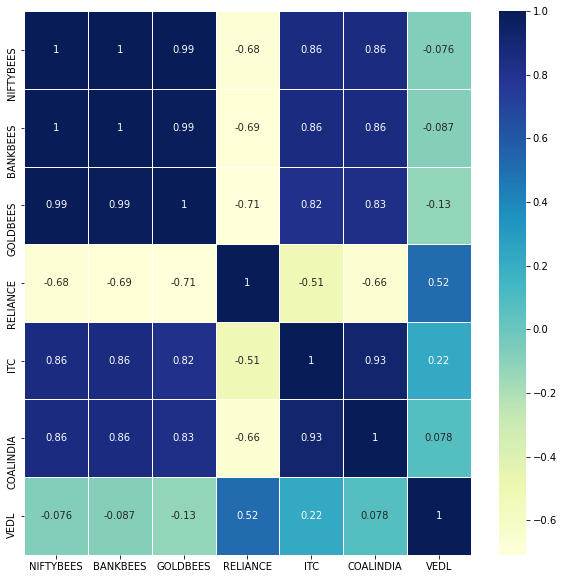

In [28]:
fig1 = plt.figure(figsize=(10,10))
sb.heatmap(correlation_matrix,xticklabels=correlation_matrix.columns,yticklabels=correlation_matrix.columns,
              cmap = 'YlGnBu',annot = True, linewidth=0.5)
print('Correlation between Stocks in you portfolio')
plt.show(fig1)

Risk & Return

In [11]:
# pct_change returns percentage change between element and its prior one
daily_simple_return = df.pct_change(1)
daily_simple_return.dropna(inplace=True)
daily_simple_return

,NIFTYBEES,BANKBEES,GOLDBEES,RELIANCE,ITC,COALINDIA
Date,,,,,,
2020-10-15,-0.020483,-0.034269,0.003398,-0.035410,-0.016389,0.000452
2020-10-16,0.006490,0.019704,0.004289,-0.013913,0.003938,0.006781
2020-10-19,0.009473,0.031290,0.000674,0.000184,0.015389,0.030085
2020-10-20,-0.000315,0.000861,-0.001797,-0.009328,-0.004755,-0.009154
2020-10-21,0.001657,0.012986,0.007876,-0.014518,0.001194,0.012758
...,...,...,...,...,...,...
2021-12-02,0.012223,0.003956,-0.005581,0.006425,0.015998,0.024108
2021-12-03,-0.010586,-0.007663,-0.001464,-0.030046,-0.016855,0.002825
2021-12-06,-0.016075,-0.012542,0.009286,-0.018956,-0.016919,-0.070110


Visualizing Daily Simple Returns

Daily Simple returns


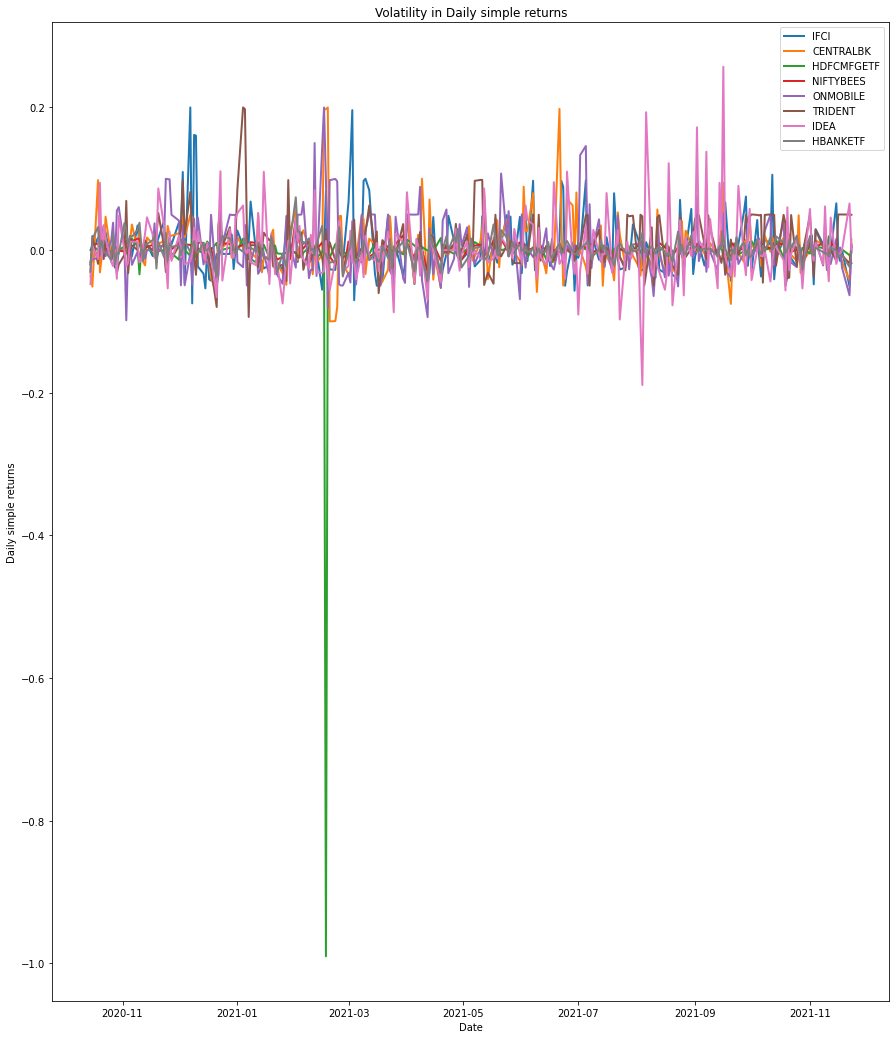

In [16]:
print('Daily Simple returns')
fig, ax = plt.subplots(figsize=(15,18))

for i in daily_simple_return.columns.values:
    ax.plot(daily_simple_return[i], lw=2,label=i)

ax.legend(loc = 'upper right', fontsize=10)
ax.set_title('Volatility in Daily simple returns')
ax.set_xlabel('Date')
ax.set_ylabel('Daily simple returns')
plt.show(fig)

Average Daily Returns

In [17]:
print('Average Daily returns(%) of stocks in your protfolio')
Avg_daily = daily_simple_return.mean()
print(Avg_daily*100)

Average Daily returns(%) of stocks in your protfolio
IFCI          0.350001
CENTRALBK     0.295521
HDFCMFGETF   -0.376830
NIFTYBEES     0.148658
ONMOBILE      0.405983
TRIDENT       0.732558
IDEA          0.178765
HBANKETF      0.172296
dtype: float64


Risk

<AxesSubplot:title={'center':'Risk box Plot'}>

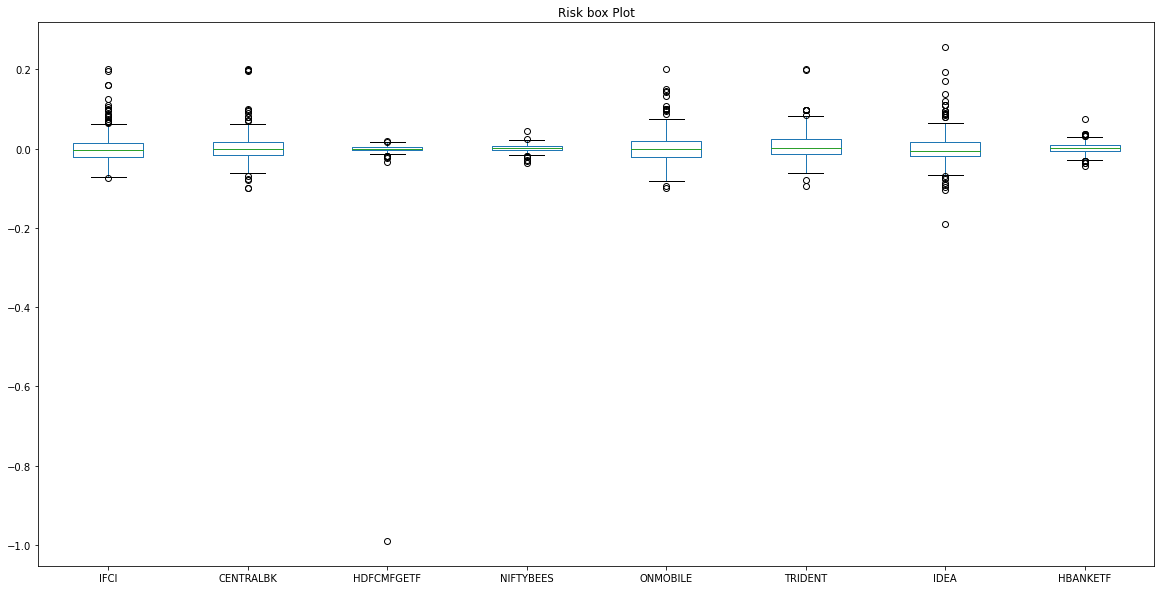

In [18]:
daily_simple_return.plot(kind='box',figsize = (20,10), title= 'Risk box Plot')

In [19]:
print('Annualized Standard Deviation (Volatality(%), 252 trading days) of individual stocks in your portfolio on the asis of daily simple returns')
print(daily_simple_return.std() * np.sqrt(252) * 100)

Annualized Standard Deviation (Volatality(%), 252 trading days) of individual stocks in your portfolio on the asis of daily simple returns
IFCI          63.751773
CENTRALBK     61.783688
HDFCMFGETF    95.571583
NIFTYBEES     14.025769
ONMOBILE      65.632150
TRIDENT       55.317166
IDEA          69.966777
HBANKETF      22.291109
dtype: float64


Return Per Unit of Risk

In [20]:
Avg_daily / (daily_simple_return.std() * np.sqrt(252)) * 100

IFCI          0.549006
CENTRALBK     0.478316
HDFCMFGETF   -0.394291
NIFTYBEES     1.059889
ONMOBILE      0.618573
TRIDENT       1.324287
IDEA          0.255500
HBANKETF      0.772935
dtype: float64

Cumulative Returns

In [21]:
daily_cummulative_simple_return = (daily_simple_return + 1).cumprod()
daily_cummulative_simple_return

,IFCI,CENTRALBK,HDFCMFGETF,NIFTYBEES,ONMOBILE,TRIDENT,IDEA,HBANKETF
Date,,,,,,,,
2020-10-15,0.982759,0.964126,1.000132,0.979517,0.980094,0.968354,0.952381,0.970129
2020-10-16,0.982759,0.914798,1.006569,0.985873,0.967213,0.987342,0.958333,0.985149
2020-10-19,1.000000,1.004484,1.006657,0.995213,0.956674,0.968354,0.946429,1.016961
2020-10-20,0.991379,0.973094,1.005167,0.994899,0.963700,1.000000,1.035714,1.017467
2020-10-21,1.008621,0.964126,1.011879,0.996547,0.957845,1.006329,1.023810,1.031263
...,...,...,...,...,...,...,...,...
2021-11-16,2.241379,1.937220,0.009680,1.526213,2.624122,5.189873,1.190476,1.623407
2021-11-17,2.206897,1.928251,0.009620,1.518835,2.633489,5.449367,1.184524,1.612016
2021-11-18,2.206897,1.896861,0.009629,1.507927,2.569087,5.721519,1.184524,1.601384


Cummulative Returns


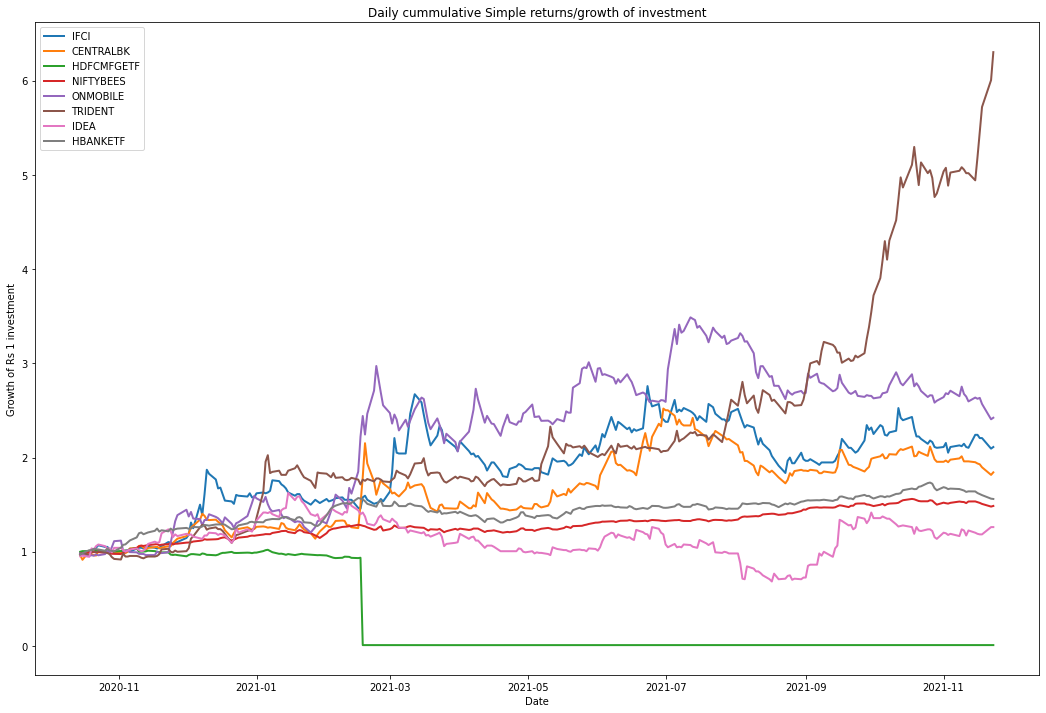

In [22]:
print('Cummulative Returns')
fig,ax = plt.subplots(figsize=(18,12))

for i in daily_cummulative_simple_return.columns.values:
    ax.plot(daily_cummulative_simple_return[i],lw=2,label=i)

ax.legend(loc = 'upper left', fontsize=10)
ax.set_title('Daily cummulative Simple returns/growth of investment')
ax.set_xlabel('Date')
ax.set_ylabel('Growth of Rs 1 investment')
plt.show(fig)